In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples


In [59]:
def plot_clustering_results(X, labels, centers, silhouette_avg, title, n_clusters=4):
    """
    Plots the clustering results and the silhouette scores for each sample.

    Parameters:
    X : array-like, shape (n_samples, n_features)
        The input data points.
    labels : array-like, shape (n_samples,)
        The cluster labels for each data point.
    centers : array-like, shape (n_clusters, n_features), optional
        The coordinates of the cluster centers. If None, no centers are plotted.
    silhouette_avg : float
        The average silhouette score for all the samples.
    n_clusters : int, optional, default=4
        The number of clusters.

    Returns:
    None
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # Plot the clustering result
    ax1.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    if centers is not None:
        ax1.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title(f'{title} Clustering Result')
   
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters+1):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i-1] # dbscan labels noise as - 1
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("The silhouette plot for the various clusters.")
    ax2.set_xlabel("The silhouette coefficient values")
    ax2.set_ylabel("Cluster label")

    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

In [51]:
def plot_dbscan_clustering_results(X, labels, silhouette_avg, n_clusters=4):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
    unique_labels = set(labels)
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True



    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = X[class_member_mask & core_samples_mask]
        ax1.plot(xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = X[class_member_mask & ~core_samples_mask]
        ax1.plot(xy[:, 0], xy[:, 1], "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )
        
    ax1.set_title("DBSCAN Clustering Results")
    ax1.set_xlabel("X-axis")
    ax1.set_ylabel("Y-axis")
    

    
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(len(unique_labels)+1):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i-1] # dbscan labels noise as - 1
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / len(unique_labels))
        ax2.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax2.set_title("Silhouette Plot for DBSCAN Clusters")
    ax2.set_xlabel("Silhouette Coefficient Values")
    ax2.set_ylabel("Cluster Label")
    ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax2.set_yticks([])
    ax2.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

c:\Users\hajip\Desktop\humber\binf5507 AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.7871188174002861


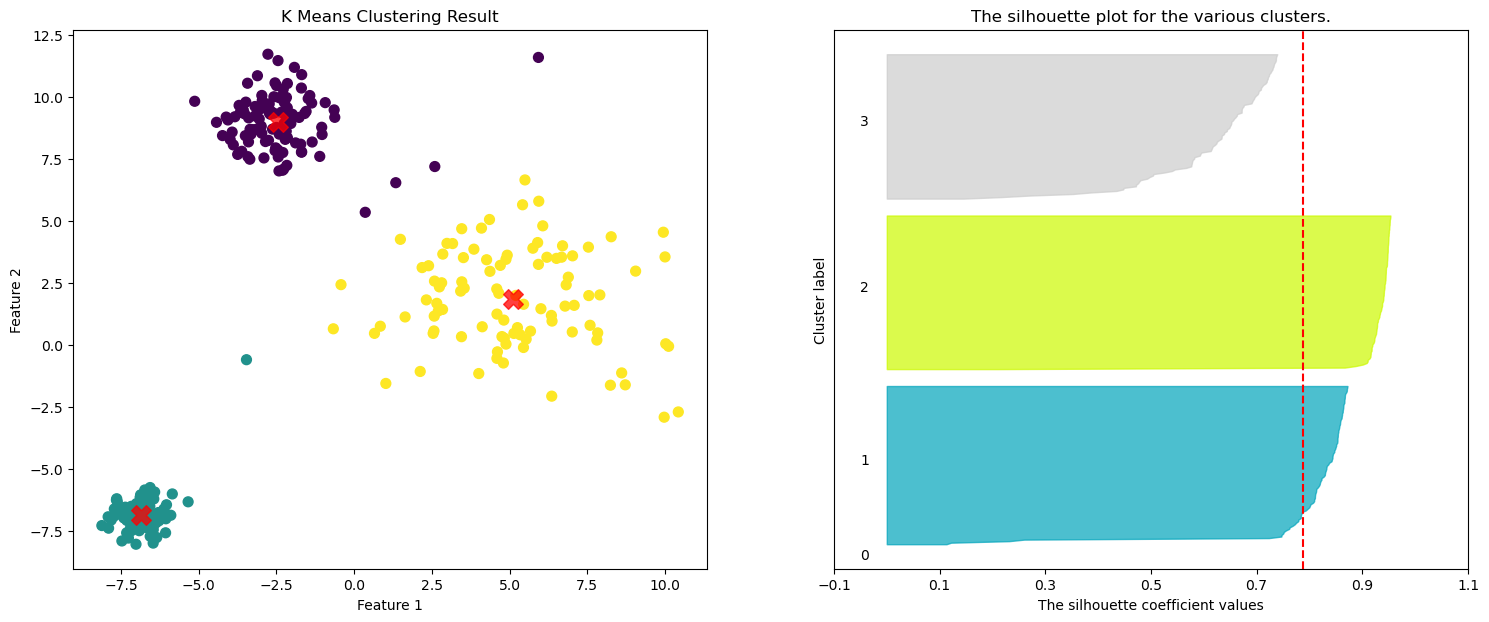

In [93]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)
# Train a k-Means clustering model
kmeans = KMeans(n_clusters=3, max_iter=6, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Evaluate the model


silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X, y_kmeans, centers, silhouette_avg, title = "K Means", n_clusters=3)

c:\Users\hajip\Desktop\humber\binf5507 AI\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score: 0.4275849325381403


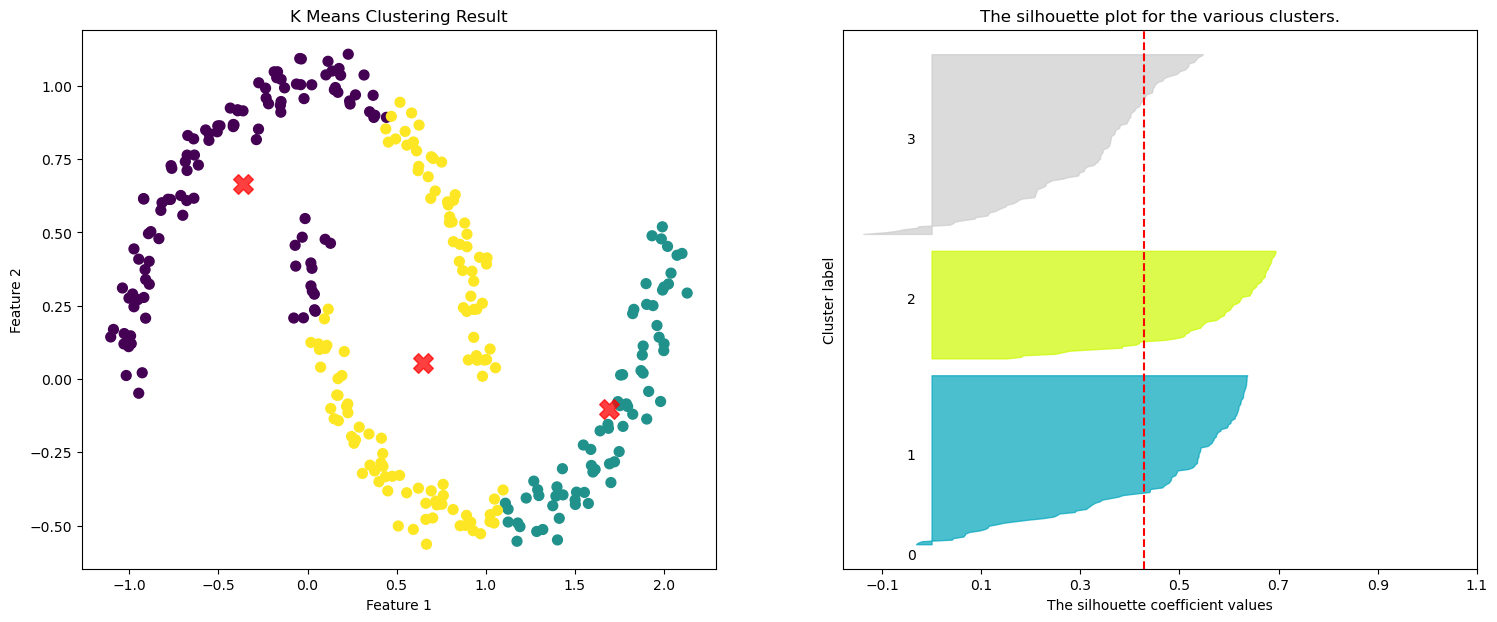

In [62]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Train a k-Means clustering model
kmeans = KMeans(n_clusters=3, max_iter=6, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Evaluate the model


silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
centers = kmeans.cluster_centers_
plot_clustering_results(X, y_kmeans, centers, silhouette_avg, title = "K Means", n_clusters=3)

[ 0  0  1  2  0  2  1  2  1  1  1  2  1  1  0  1  0  2  1  1  1  1  2  0
  1  0  0 -1  2  1  1  1  0  1  0  1  0  2  0  2  2  1  0  2  1  1  0  2
  0  2  2  0  0  1  0 -1  0  1  2  1  0  2  2  0  0  2  2  0  0  1  2  0
  0  1  1  0  0  2  1  2  1  1  0  1  2  0  0  1  2  1  0  1  0  1  1  0
  0  1  0  0  2  1  2  1  1  1  1  1  2  0  2  1  1  1  1  2  0  2  0  2
  2  2  1  0  0  0  0  1  0  0  1  1  1  1  1  2  2  0  1  0  1  1  0  1
  2  2  2  1  2  1  1  0  2  0  1  2  2  0  0  1  1  0  0  0  1  0  2  1
  1  1  1  1  2  1  2  2  2  1  2  2  0  1  0  2  2  0  2  1 -1  2  0  0
  2  0  2  2  2  2  1  0  1  1  2  2  1  2  0  0  2  1  1  0  2  2  0  0
  0  0  1  0  0  2  0  0  1  2  0  0  2  1  1  0  1  0  2  2  0  2  0  0
  0  2  2  1  0  2  2  2  0  2  0  2  0  2  2  0  2  1  0  1  1  1  0  1
  2  2  0  2  2  1  1  2  2  2  0  0  0  1  1  1  2  2  2  2  0  2  0  2
  2  0  1  2  2  1  0  1  2  1  0  0]
Silhouette Score: 0.7392510341829135


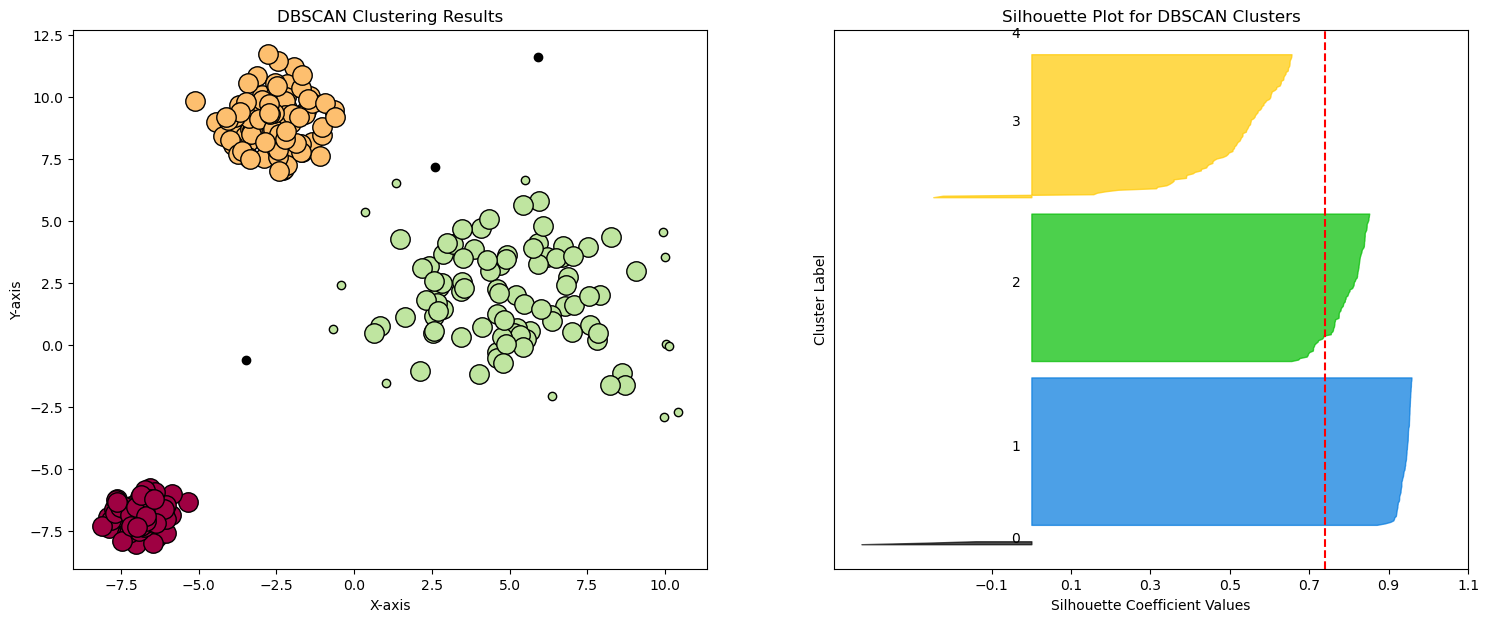

In [92]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Train a DBSCAN clustering model
dbscan = DBSCAN(eps = 2.5, min_samples = 10)

dbscan.fit(X)
y_dbscan = dbscan.fit_predict(X)

print(y_dbscan)

silhouette_avg = silhouette_score(X, y_dbscan)
print(f"Silhouette Score: {silhouette_avg}")

plot_dbscan_clustering_results(X, y_dbscan, silhouette_avg, n_clusters=3)



Silhouette Score: 0.33078776489960326


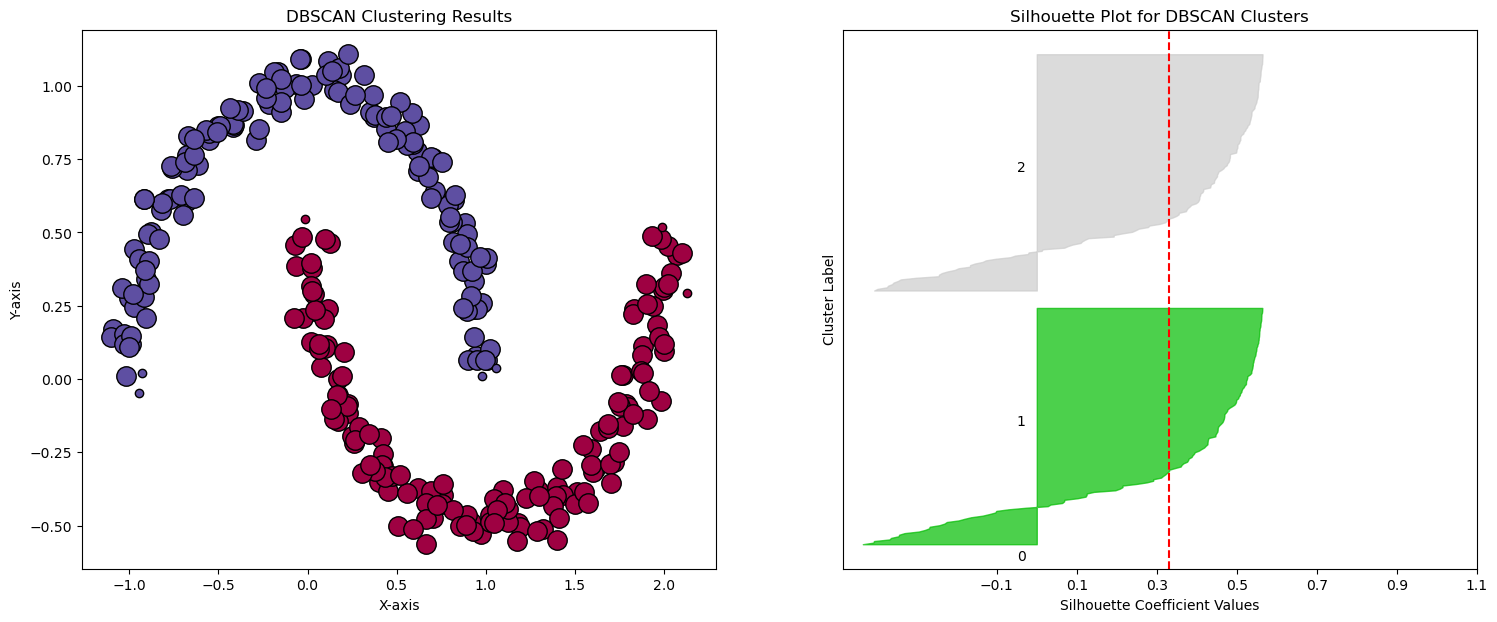

In [55]:

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
# Train a DBSCAN clustering model
dbscan = DBSCAN(eps = 0.2, min_samples = 10)

dbscan.fit(X)
y_dbscan = dbscan.fit_predict(X)



silhouette_avg = silhouette_score(X, y_dbscan)
print(f"Silhouette Score: {silhouette_avg}")


plot_dbscan_clustering_results(X, y_dbscan, silhouette_avg, n_clusters=3)

Silhouette Score: 0.7829608619633761


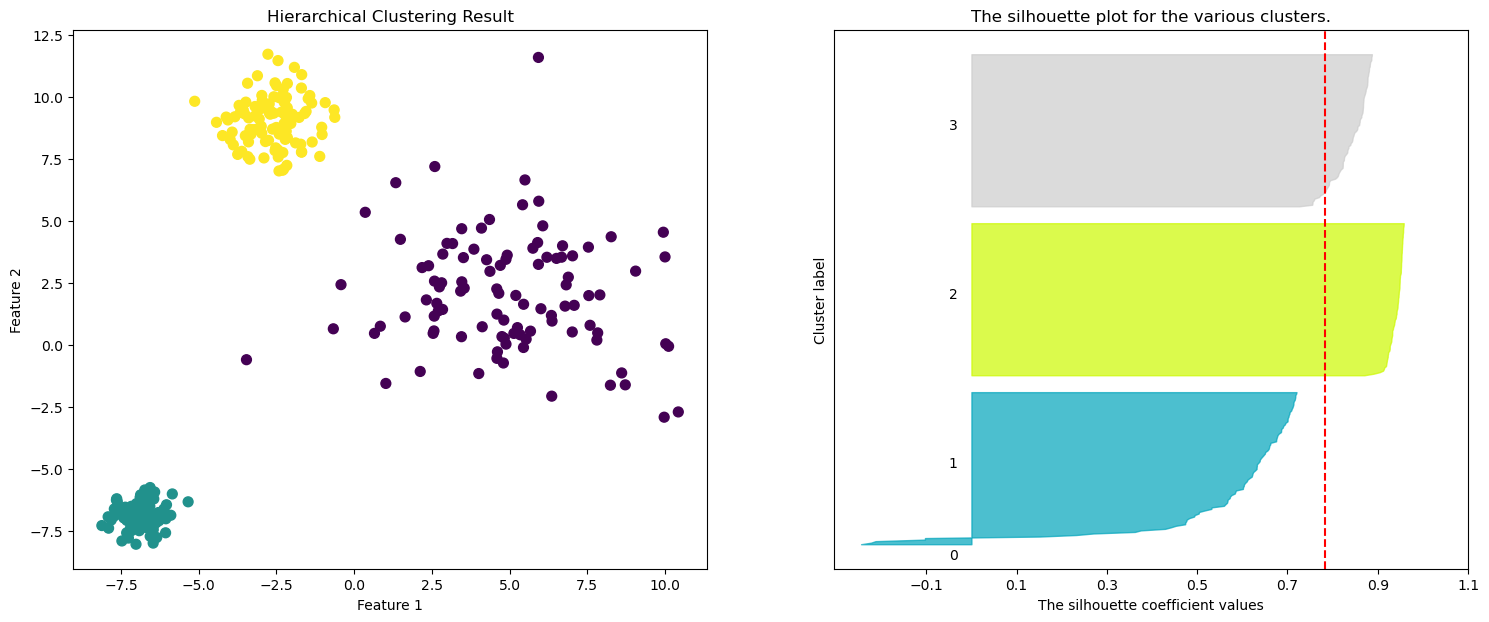

In [94]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Perform agglomerative clustering
Z = linkage(X, 'ward')

# Train an agglomerative clustering model
agg_clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Evaluate the model
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X, y_agg, None, silhouette_avg, title = "Hierarchical", n_clusters=3)

Silhouette Score: 0.3934681696721096


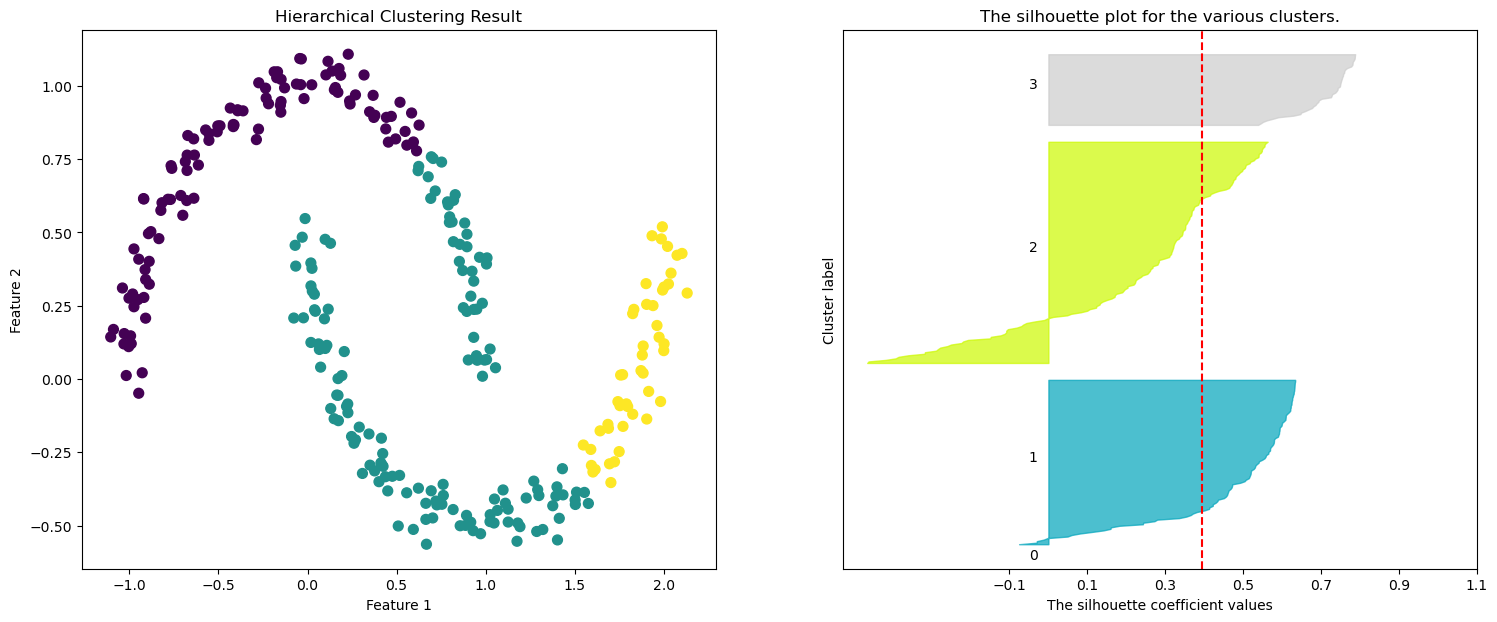

In [67]:
# Generate synthetic data
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Perform agglomerative clustering
Z = linkage(X, 'ward')

# Train an agglomerative clustering model
agg_clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Evaluate the model
silhouette_avg = silhouette_score(X, y_agg)
print(f"Silhouette Score: {silhouette_avg}")

# Plot the clustering results using the custom function
plot_clustering_results(X, y_agg, None, silhouette_avg, title = "Hierarchical", n_clusters=3)